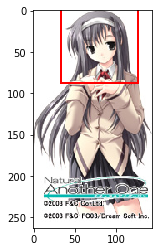

In [10]:
import cv2
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier('lbpcascade_animeface.xml')
img = cv2.imread('../dataset/GetChu_76-118/c36263chara1.jpg')
fig = plt.gca()
plt.imshow(img[:,:,::-1])

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 5, minSize = (24, 24))
for face in faces:
    (stx, sty, w, h) = face
    stx -= (w*0.3)
    sty -= (h*0.3)
    w *= 1.5
    h *= 1.45
    rect=plt.Rectangle((stx, sty),w,h,
                       linewidth=2,edgecolor='r',facecolor='none')
    fig.add_patch(rect)
plt.show()

In [11]:
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

imgs = glob('../dataset/GetChu_aligned/*')
imgs=np.array(imgs)
print(len(imgs))
sizes = []
for img in tqdm(imgs):
    im = plt.imread(img)
    sizes.append(min(im.shape[0],im.shape[1]))

  0%|          | 108/44635 [00:00<00:41, 1075.80it/s]

44635


100%|██████████| 44635/44635 [00:29<00:00, 1530.39it/s]


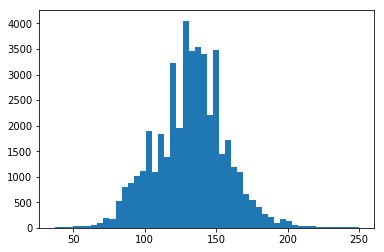

In [12]:
plt.hist(sizes, bins=50)
plt.show()

In [13]:
import numpy as np
det_ind = np.where(np.array(sizes)<70)[0]
print(det_ind.shape)

(229,)


In [14]:
det_imgs = imgs[det_ind]
import os
for d in det_imgs:
    os.remove(d)

In [15]:
file_sizes = []
imgs = np.array(glob('../dataset/GetChu_aligned/*'))
for img in tqdm(imgs):
    file_sizes.append(os.path.getsize(img))
file_sizes=np.array(file_sizes)

100%|██████████| 44406/44406 [00:00<00:00, 278495.15it/s]


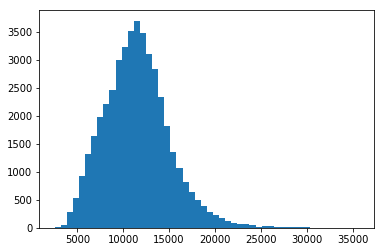

In [16]:
plt.hist(file_sizes, bins=50)
plt.show()

In [17]:
det_ind = np.where(np.array(file_sizes)<7000)[0]
print(det_ind.shape)

(4336,)


In [18]:
det_imgs = imgs[det_ind]
import os
for d in det_imgs:
    os.remove(d)

In [19]:
len(glob('../dataset/GetChu_aligned/*'))

40070

In [ ]:
plt.imread()